/home/wojtek/studia/naive-bayes-classifier/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


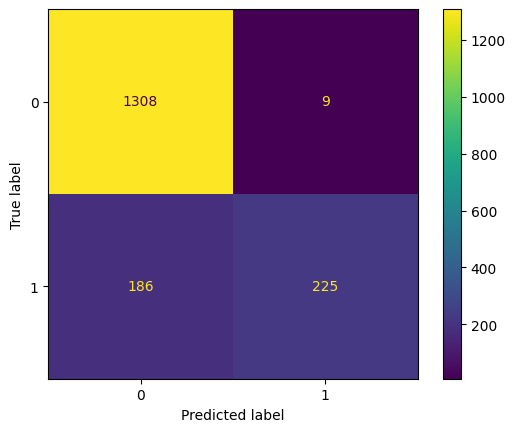

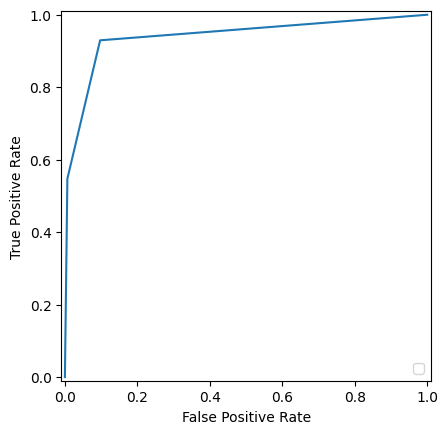

In [9]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve

with open('X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('Y.pkl', 'rb') as file:
    y = pickle.load(file)

X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]

classificator = KNeighborsClassifier(2)
classificator.fit(X_train, y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

y_prob = classificator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

plt.show()